### Importing Necessary libraries


In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

### Taking a Look at the Data

In [44]:
df = pd.read_csv('summer-products.csv')
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [47]:
#checking for null values
df.isnull().sum()

title                           0
title_orig                      0
price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
urgency_text                    0
origin_country

In [46]:
df = df.dropna()
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
39,5 Couleur Femmes De Mode D'été Mince Sans Manc...,5 Color Women's Fashion Summer Slim Sleeveless...,13.0,13,EUR,1000,0,4.16,138,82.0,...,12913,3.981337,55ed5a3362e273427107759e,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5d2fd5a9af7a0c5b21369a05,https://contestimg.wish.com/api/webimage/5d2fd...,5d2fd5a9af7a0c5b21369a05,summer,2020-08
57,Sexy Solid Solid Ruffled Chiffon Sling Top Pur...,Sexy Solid Ruffled Chiffon Sling Top Pure Colo...,9.0,8,EUR,5000,0,4.06,743,400.0,...,20681,3.999371,5660e53e769a564b3e3aeca0,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5c879aba202e6b38cd317164,https://contestimg.wish.com/api/webimage/5c879...,5c879aba202e6b38cd317164,summer,2020-08
76,Femmes Mode Combinaison Courte Spaghetti Strap...,Women Fashion Short Jumpsuit Spaghetti Strap S...,7.0,6,EUR,100,0,4.26,53,30.0,...,2055,3.837956,5d462e58f320403871a78593,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5e4267d60640954a435e64f5,https://contestimg.wish.com/api/webimage/5e426...,5e4267d60640954a435e64f5,summer,2020-08
140,2018 New Fashion Women Casual Playsuit Dames J...,2018 New Fashion Women Casual Playsuit Ladies ...,11.0,10,EUR,5000,0,3.72,1008,447.0,...,61895,4.268002,55e7e41e606d0a18fdfc67d1,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5aec22cec25735338c544690,https://contestimg.wish.com/api/webimage/5aec2...,5aec22cec25735338c544690,summer,2020-08
157,Summer Fashion Women - Robe décontractée sans ...,Summer Fashion Women Round Neck Sleeveless Pur...,7.0,9,EUR,1000,0,3.75,219,101.0,...,30643,4.152727,5853765779b45e0b58ad30f4,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5a3e27622b0a1c693c87e849,https://contestimg.wish.com/api/webimage/5a3e2...,5a3e27622b0a1c693c87e849,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,Grande taille mode femmes été débardeurs décon...,Plus Size Fashion Women Summer Casual Tank Top...,7.0,13,EUR,1000,1,3.74,54,25.0,...,36913,3.949422,566a25e33a698c1f131fd872,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5e686ce3e1cc2837f55f4401,https://contestimg.wish.com/api/webimage/5e686...,5e686ce3e1cc2837f55f4401,summer,2020-08
1418,ZANZEA - Damen Sommer Mode Lose Rundhals Baumw...,ZANZEA Damen Sommer Mode Lose Rundhals Baumwol...,16.0,108,EUR,10000,1,4.25,1524,905.0,...,90105,4.201298,58131ddf6f55296033923a7c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5b2a113209dce569672cc9f2,https://contestimg.wish.com/api/webimage/5b2a1...,5b2a113209dce569672cc9f2,summer,2020-08
1465,Pantalon de yoga sport couleur unie pour femme...,Women Casual Loose Linen Trousers Solid Color ...,6.0,7,EUR,10000,0,3.75,1238,537.0,...,5993,4.055231,5556c60071e86d19fe7590d4,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5cf608da188cc348c6d66b74,https://contestimg.wish.com/api/webimage/5cf60...,5cf608da188cc348c6d66b74,summer,2020-08
1534,Femmes Chemisier d'été Chemise Sexy Floral Che...,Womens Summer Blouse Sexy Floral Shirt Loose K...,11.0,18,EUR,20000,1,4.14,5759,3125.0,...,320031,4.218866,5357bcf2bb72c5504882e889,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/572981a997dc5f5d3c5f0651,https://contestimg.wish.com/api/webimage/57298...,572981a997dc5f5d3c5f0651,summer,2020-08


### Looking At Feature Importance Breakdown

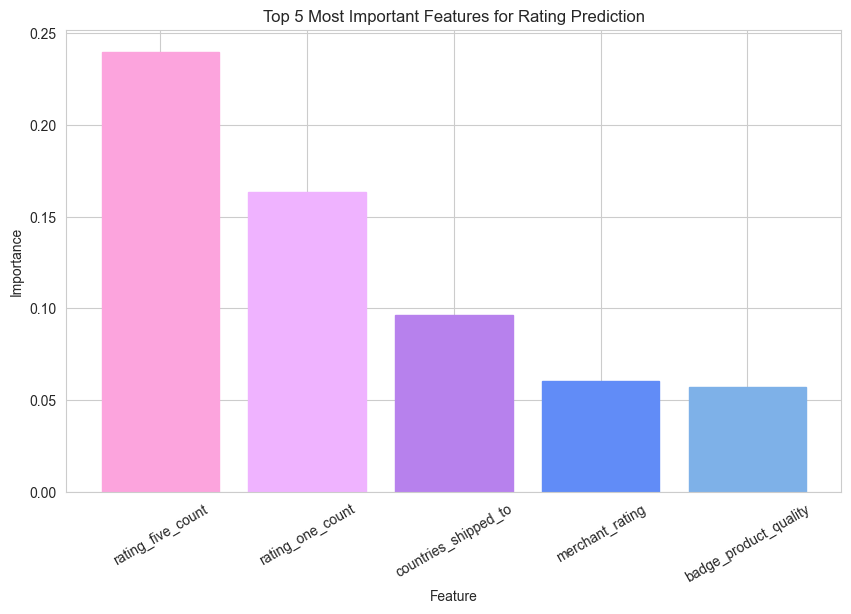

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# ---- Get feature importances ----
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# ---- Sort & take top 5 ----
top5 = importance_df.sort_values(by='Importance', ascending=False).head(5)

# ---- Plot (colorful + clean) ----
plt.figure(figsize=(10, 6))
bars = plt.bar(top5['Feature'], top5['Importance'])

# fun colors
for bar, color in zip(bars, ['#FCA4DD','#EFB3FF',"#b781ed","#618cf7","#7eb1e8"]):
    bar.set_color(color)

plt.title('Top 5 Most Important Features for Rating Prediction')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=30)
plt.show()


### Applying the RandomForestRegressor

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---- Copy for safety ----
df = df.copy()

# ---- Target ----
y = df['rating']

# ---- Select useful features ----
X = df[
    [
        'price',
        'retail_price',
        'units_sold',
        'uses_ad_boosts',
        'rating_count',
        'rating_five_count',
        'rating_four_count',
        'rating_one_count',
        'badge_product_quality',
        'badge_fast_shipping',
        'product_variation_inventory',
        'shipping_option_price',
        'shipping_is_express',
        'countries_shipped_to',
        'merchant_rating'
    ]
]

# ---- Fill missing values ----
X = X.fillna(0)
y = y.fillna(y.mean())

# ---- Train / Validation / Test split ----
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ---- Train model ----
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# ---- Evaluate ----
val_pred = model.predict(X_val)

print("Validation R²:", model.score(X_val, y_val))
print("Test R²:", model.score(X_test, y_test))
print("Validation MSE:", mean_squared_error(y_val, val_pred))
print("Validation MAE:", mean_absolute_error(y_val, val_pred))


Validation R²: 0.3246548656351851
Test R²: 0.48800541666666863
Validation MSE: 0.2119383108333315
Validation MAE: 0.3220333333333325


### Testing The Model

In [89]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ---- Example function to predict rating ----
def predict_rating(model, input_features, true_rating=None):
    """
    Predicts rating for a single item or multiple items.
    
    Parameters:
    - model: trained RandomForestRegressor
    - input_features: dict or pd.DataFrame of features
    - true_rating: actual rating (optional), for calculating error
    
    Returns:
    - predicted_rating
    - error metrics if true_rating is provided
    """
    # Convert dict to DataFrame if needed
    if isinstance(input_features, dict):
        input_features = pd.DataFrame([input_features])
    
    # Fill missing values
    input_features = input_features.fillna(0)
    
    # Predict rating
    pred = model.predict(input_features)
    
    # If true rating is provided, compute errors
    if true_rating is not None:
        if isinstance(true_rating, (int, float)):
            true_rating = [true_rating]
        mse = mean_squared_error(true_rating, pred)
        mae = mean_absolute_error(true_rating, pred)
        return pred, mse, mae
    else:
        return pred

# ---- Example usage ----
new_item = {
    'price': 9.0,
    'retail_price': 8,
    'units_sold': 5000,
    'uses_ad_boosts': 1,
    'rating_count': 743,
    'rating_five_count': 400,
    'rating_four_count': 320,
    'rating_one_count': 23,
    'badge_product_quality': 0,
    'badge_fast_shipping': 0,
    'product_variation_inventory': 0,
    'shipping_option_price': 5,
    'shipping_is_express': 0,
    'countries_shipped_to': 3,
    'merchant_rating': 4.5
}

# Predict without true rating
predicted = predict_rating(model, new_item)
print("Predicted rating:", predicted)

# Predict with true rating for accuracy
true_rating = 3.5
predicted, mse, mae = predict_rating(model, new_item, true_rating=true_rating)
print("Predicted rating:", predicted)
print("MSE:", mse)
print("MAE:", mae)


Predicted rating: [3.9]
Predicted rating: [3.9]
MSE: 0.16000000000000242
MAE: 0.400000000000003


## Plotting the Errors

### Scatter Plot with Prediction Line

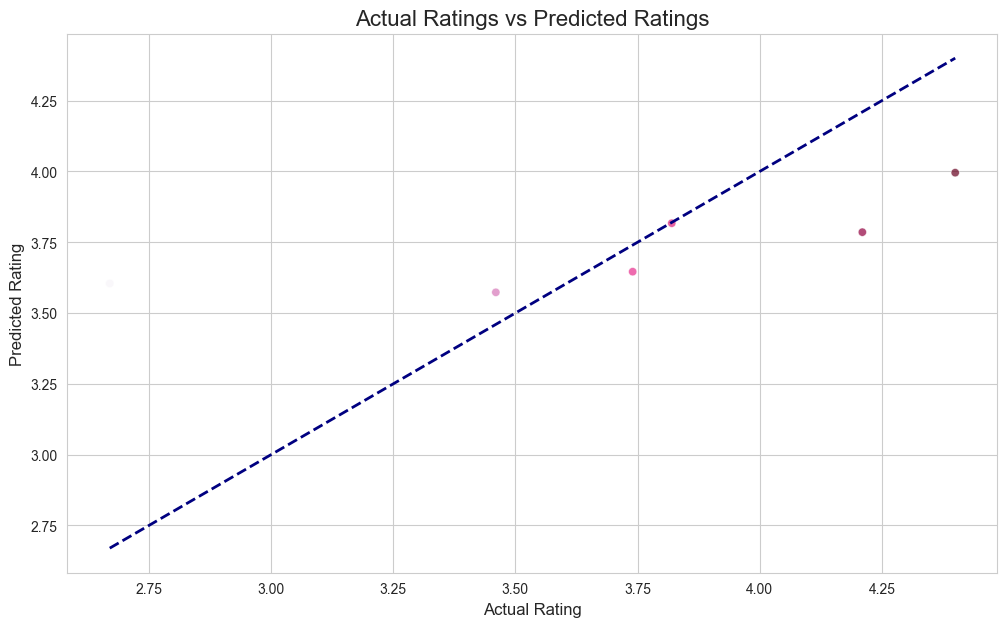

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
val_pred = model.predict(X_val)

plt.figure(figsize=(12, 7))

# Scatter plot
scatter = sns.scatterplot(
    x=y_val,
    y=val_pred,
    hue=y_val,
    palette="PuRd",
    alpha=0.7,
    legend=False   # hides legend since it's redundant
)

# Perfect prediction line
plt.plot(
    [y_val.min(), y_val.max()],
    [y_val.min(), y_val.max()],
    linestyle="--",
    color="navy",
    linewidth=2
)

plt.title('Actual Ratings vs Predicted Ratings', fontsize=16)
plt.xlabel('Actual Rating', fontsize=12)
plt.ylabel('Predicted Rating', fontsize=12)

plt.show()


### Residuals vs. Actual Ratings

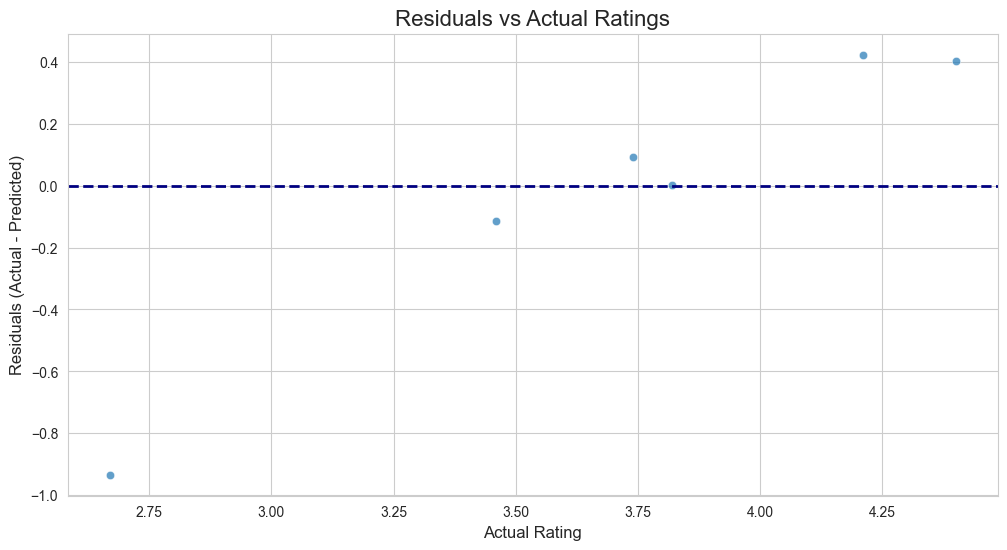

In [72]:
residuals = y_val - val_pred

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val, y=residuals, alpha=0.7)
plt.axhline(0, color='navy', linestyle='--', linewidth=2)
plt.title('Residuals vs Actual Ratings', fontsize=16)
plt.xlabel('Actual Rating', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.show()



### Visualization 3

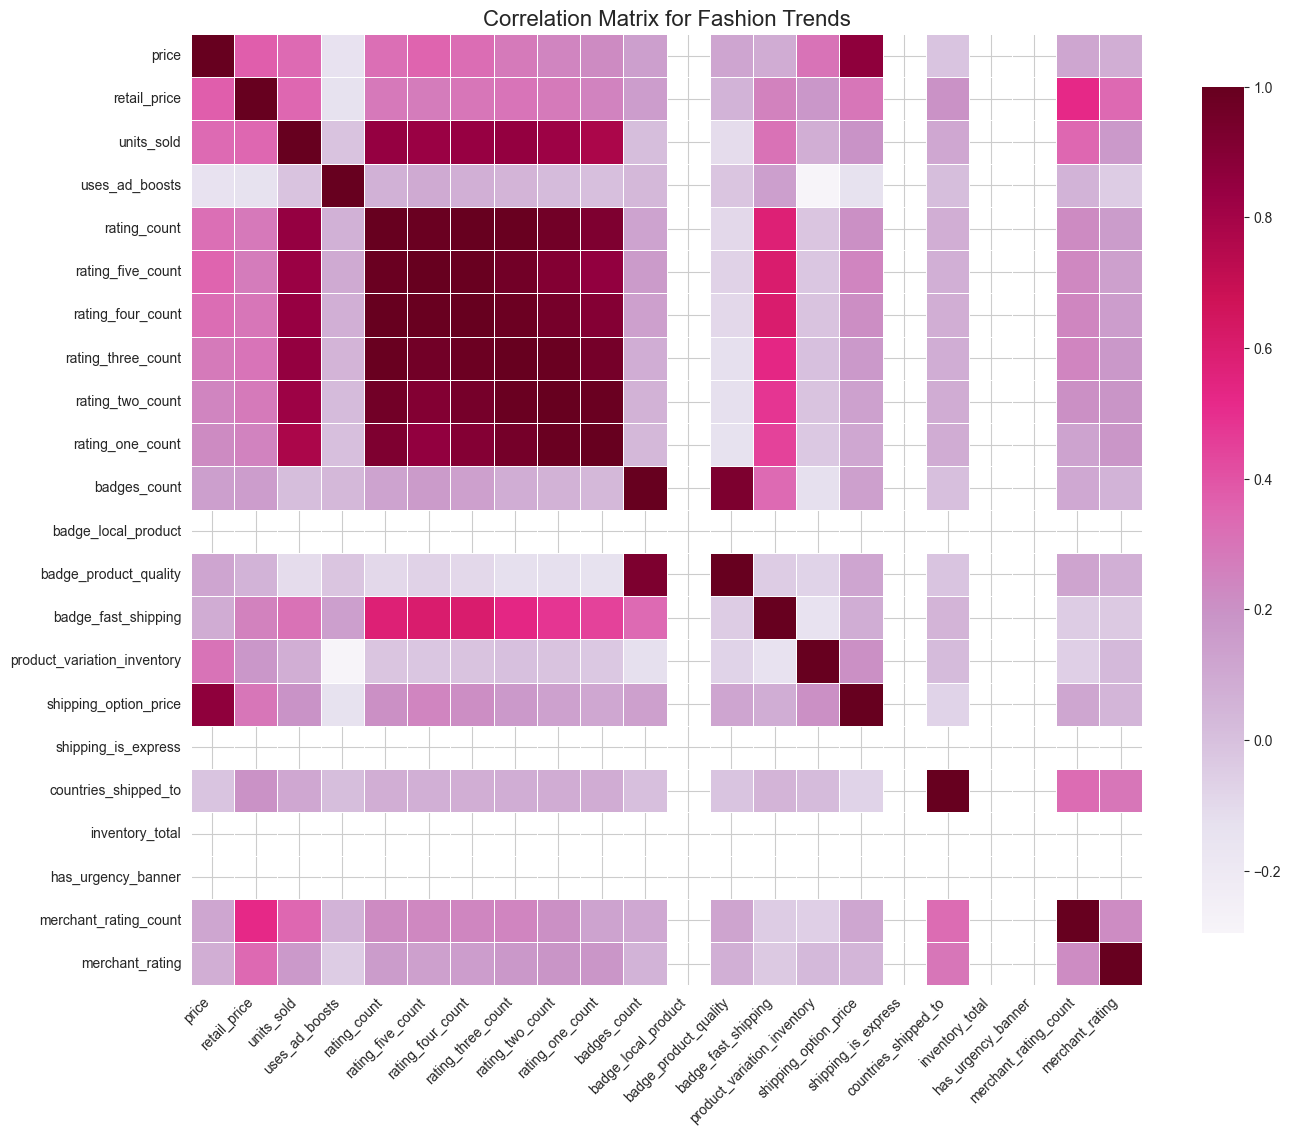

In [76]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    cor_numVar,
    cmap='PuRd',
    annot=False,      # or True if you want numbers
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8}
)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix for Fashion Trends', fontsize=16)
plt.tight_layout()
plt.show()

